# Pyber Data Analysis

## Analysis

*	There is a clear gradient between Urban, Suburban, and Rural Pyber ride sharing data in terms of the Average Fare, Total Number of Rides, and the Driver Count per city as seen on the bubble plot. The plot represents a great example of supply and demand trends, and its effects on price.
*	Urban Areas make up 80.9% of Pyber’s Total Drivers and 68.4% of its Total Rides. Therefore, the number of drivers directly impacts the Total Number of Rides and Average Fare variables.
* In contrast, Suburban Areas make up 16.5% of Pyber’s Total Drivers and 30.5% of Pyber’s Total Fares. This profit ratio is much more favorable. Therefore, the Pyber management may want to consider limiting the number of drivers per city in Urban Areas in order to increase its profitability. 

In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_data = pd.merge(ride_data,city_data, on="city", how="outer")


# Display the data table for preview
combined_data.head()



,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

### Obtain the x and y coordinates for each of the three city types


In [15]:
#X, Y, & Size variables of Urban Rides
Urban_df =combined_data.loc[combined_data["type"] == "Urban", :]


Urban_by_City=Urban_df.groupby("city")
Urban_AF=Urban_by_City["fare"].mean()
Urban_RPC=Urban_by_City["date"].count()
Urban_DC=(Urban_by_City["driver_count"].max()*10)


In [16]:
#X, Y, & Size variables of Rural Rides
Rural_df =combined_data.loc[combined_data["type"] == "Rural", :]


Rural_by_City=Rural_df.groupby("city")
Rural_AF=Rural_by_City["fare"].mean()
Rural_RPC=Rural_by_City["date"].count()
Rural_DC=(Rural_by_City["driver_count"].max()*10)

In [17]:
#X, Y, & Size variables of Suburban Rides
Suburban_df =combined_data.loc[combined_data["type"] == "Suburban", :]


Suburban_by_City=Suburban_df.groupby("city")
Suburban_AF=Suburban_by_City["fare"].mean()
Suburban_RPC=Suburban_by_City["date"].count()
Suburban_DC=(Suburban_by_City["driver_count"].max()*10)

### Plot

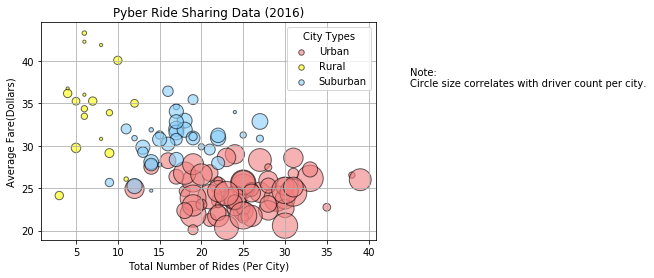

<Figure size 432x288 with 0 Axes>

In [18]:
# Build the scatter plots for each city types
Urban=plt.scatter(Urban_RPC,Urban_AF, marker="o", facecolors="lightcoral",label="Urban", edgecolors="black",s=Urban_DC, alpha=0.60)
Rural=plt.scatter(Rural_RPC,Rural_AF, marker="o", facecolors="yellow",label="Rural", edgecolors="black",s=Rural_DC, alpha=0.60)
Suburban=plt.scatter(Suburban_RPC,Suburban_AF, marker="o", facecolors="lightskyblue",label="Suburban", edgecolors="black",s=Suburban_DC, alpha=0.60)

# Incorporate the other graph properties
plt.grid()
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare(Dollars)")
 
# Create a legend
lgnd = plt.legend(loc="best",title="City Types", numpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(45,37,'Note:\nCircle size correlates with driver count per city.',fontsize=10)

#Show
plt.show()

# Save Figure
plt.savefig("../Images/Pyber_Scatter.png")


## Total Fares by City Type

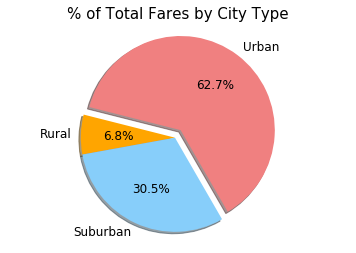

<Figure size 432x288 with 0 Axes>

In [19]:
# Calculate Type Percents
Fares_Urban=Urban_df["fare"].sum()
Fares_Rural=Rural_df["fare"].sum()
Fares_Suburban=Suburban_df["fare"].sum()

# Build Pie Chart
labels = ["Urban", "Rural", "Suburban"]
sizes = [Fares_Urban,Fares_Rural,Fares_Suburban]
colors = ["lightcoral","orange", "lightskyblue"]
explode = (0.1, 0, 0)
text = {'fontsize' : 12}

# Plot Chart
plt.pie(sizes, textprops=text,explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=300)
plt.title("% of Total Fares by City Type",fontsize=15)

# Show Fig
plt.axis("equal")
plt.show()

# Save Figure
plt.savefig("../Images/TotalFares_Pie.png")

## Total Rides by City Type

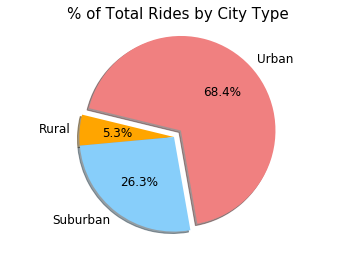

<Figure size 432x288 with 0 Axes>

In [20]:
# Calculate Ride Percents
Rides_Urban=Urban_df["ride_id"].count()
Rides_Rural=Rural_df["ride_id"].count()
Rides_Suburban=Suburban_df["ride_id"].count()

# Build Pie Chart
labelsTwo = ["Urban", "Rural", "Suburban"]
sizesTwo = [Rides_Urban,Rides_Rural,Rides_Suburban]
colorsTwo = ["lightcoral","orange", "lightskyblue"]
explodeTwo = (0.1, 0, 0)
text = {'fontsize' : 12}

# Pie Chart
plt.pie(sizesTwo, textprops=text, explode=explodeTwo, labels=labelsTwo, colors=colorsTwo,
        autopct="%1.1f%%", shadow=True, startangle=280)
plt.title("% of Total Rides by City Type",fontsize=15)

# Plot
plt.axis("equal")
plt.show()

# Save Figure
plt.savefig("../Images/TotalRides_Pie.png")

## Total Drivers by City Type

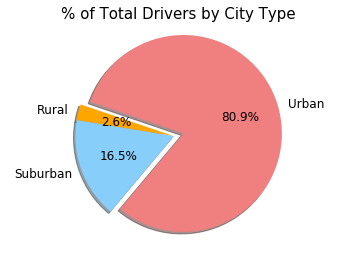

<Figure size 432x288 with 0 Axes>

In [21]:
# Calculate Driver Percents
#Urban
Driver_Urban=Urban_by_City["driver_count"].max()
Df=pd.DataFrame(Driver_Urban)
Urban_Final=Df["driver_count"].sum()
#Rural
Driver_Rural=Rural_by_City["driver_count"].max()
Df2=pd.DataFrame(Driver_Rural)
Rural_Final=Df2["driver_count"].sum()
#Suburban
Driver_Suburban=Suburban_by_City["driver_count"].max()
Df3=pd.DataFrame(Driver_Suburban)
Suburban_Final=Df3["driver_count"].sum()


# Build Pie Chart
labelsThree = ["Urban", "Rural", "Suburban"]
sizesThree = [Urban_Final,Rural_Final,Suburban_Final]
colorsThree = ["lightcoral","orange", "lightskyblue"]
explodeThree = (0.1, 0, 0)
text = {'fontsize' : 12}

# Pie Chart
plt.pie(sizesThree,textprops=text, explode=explodeThree, labels=labelsThree, colors=colorsThree,
        autopct="%1.1f%%", shadow=True, startangle=230)
plt.title("% of Total Drivers by City Type",fontsize=15)

# Plot
plt.axis("equal")
plt.show()

# Save Figure
plt.savefig("../Images/TotalDrivers_Pie.png")